# COMP4901J Project

## Setup

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import IPython.display as display
import matplotlib.pyplot as plt

tf.enable_eager_execution()
AUTOTUNE = tf.data.experimental.AUTOTUNE

## Load index csv

(629, 3)
  image-name  label    label-name
0      1.jpg     38  bonus-winter
1      2.jpg     26  characters-8
2      3.jpg      9        dots-9
3      4.jpg     36  bonus-summer
4      5.jpg     28   honors-east
(629, 4)
  image-name  label    label-name                     image-path
0      1.jpg     38  bonus-winter  ./dataset/tiles-resized/1.jpg
1      2.jpg     26  characters-8  ./dataset/tiles-resized/2.jpg
2      3.jpg      9        dots-9  ./dataset/tiles-resized/3.jpg
3      4.jpg     36  bonus-summer  ./dataset/tiles-resized/4.jpg
4      5.jpg     28   honors-east  ./dataset/tiles-resized/5.jpg


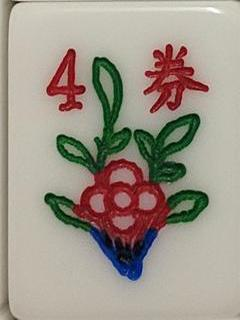

bonus-winter ; 38


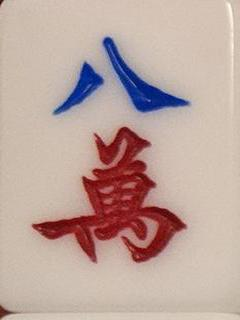

characters-8 ; 26


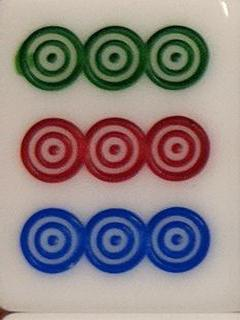

dots-9 ; 9


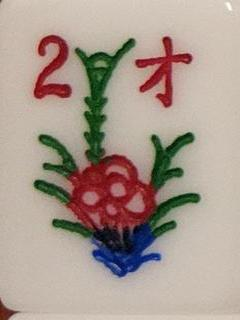

bonus-summer ; 36


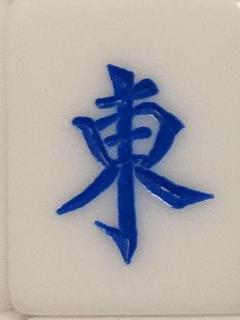

honors-east ; 28


In [13]:
dataset_index = pd.read_csv('./dataset/tiles-data/data.csv')
print(dataset_index.shape)
print(dataset_index.head())

dataset_size = dataset_index.shape[0]

# append path prefix
dataset_index['image-path'] = './dataset/tiles-resized/' + dataset_index['image-name']
print(dataset_index.shape)
print(dataset_index.head())

for i in range(5):
    display.display(display.Image(dataset_index['image-path'][i]))
    print(dataset_index['label-name'][i]+ ' ; ' + str(dataset_index['label'][i]))

## Load and preprocess images

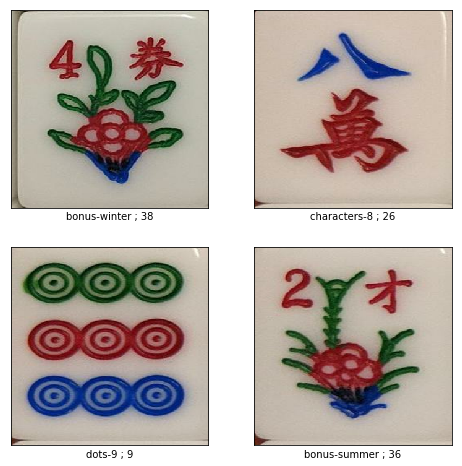

In [14]:
def load_and_preprocess_image(path):
    image = tf.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize_images(image, [320, 320])
    image /= 255.0 # normalize to [0,1]
    return image

path_ds = tf.data.Dataset.from_tensor_slices(dataset_index['image-path'])
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)
plt.figure(figsize=(8,8))
for n,image in enumerate(image_ds.take(4)):
    plt.subplot(2,2,n+1)
    plt.imshow(image)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(dataset_index['label-name'][n] + ' ; ' + str(dataset_index['label'][n]))

## Create image-label pairs

image shape:  (320, 320, 3)
label shape:  ()
types:  (tf.float32, tf.int64)

<DatasetV1Adapter shapes: ((320, 320, 3), ()), types: (tf.float32, tf.int64)>


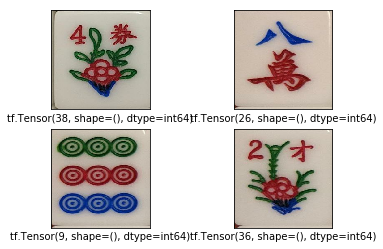

In [15]:
label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(dataset_index['label'], tf.int64))
image_label_ds = tf.data.Dataset.zip((image_ds, label_ds))
print('image shape: ', image_label_ds.output_shapes[0])
print('label shape: ', image_label_ds.output_shapes[1])
print('types: ', image_label_ds.output_types)
print()
print(image_label_ds)

for n,(image,label) in enumerate(image_label_ds.take(4)):
    plt.subplot(2,2,n+1)
    plt.imshow(image)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(label)

## Rotate images as augmentation

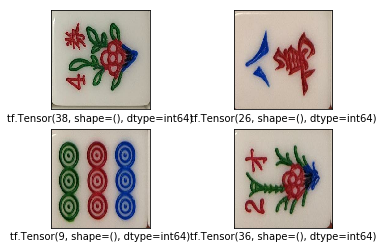

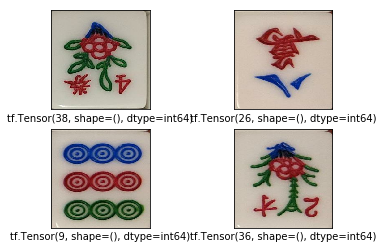

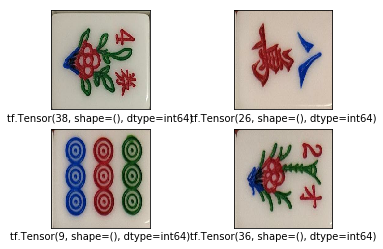

In [16]:
def rotate_image(image, label):
    image = tf.image.rot90(image)
    return (image, label)

image_label_ds_90 = image_label_ds.map(rotate_image, num_parallel_calls=AUTOTUNE)
for n,(image,label) in enumerate(image_label_ds_90.take(4)):
    plt.subplot(2,2,n+1)
    plt.imshow(image)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(label)
plt.show()

image_label_ds_180 = image_label_ds_90.map(rotate_image, num_parallel_calls=AUTOTUNE)
for n,(image,label) in enumerate(image_label_ds_180.take(4)):
    plt.subplot(2,2,n+1)
    plt.imshow(image)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(label)
plt.show()

image_label_ds_270 = image_label_ds_180.map(rotate_image, num_parallel_calls=AUTOTUNE)
for n,(image,label) in enumerate(image_label_ds_270.take(4)):
    plt.subplot(2,2,n+1)
    plt.imshow(image)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(label)
plt.show()

dataset_size *= 4

## Concat, Shuffle and Split into subsets

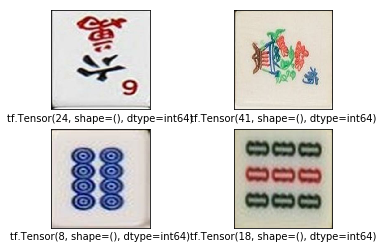

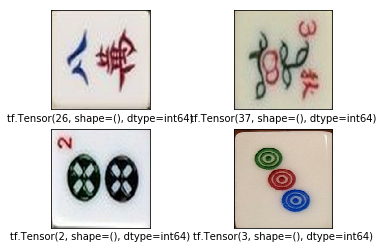

In [22]:
final_ds = image_label_ds.concatenate(image_label_ds_90).concatenate(image_label_ds_180).concatenate(image_label_ds_270)
final_ds = final_ds.shuffle(buffer_size=10000) # affects randomness, best > size

train_ds = final_ds.take(int(dataset_size * 0.7))
test_ds = final_ds.skip(int(dataset_size * 0.7))

for n,(image,label) in enumerate(train_ds.take(4)):
    plt.subplot(2,2,n+1)
    plt.imshow(image)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(label)
plt.show()

for n,(image,label) in enumerate(test_ds.take(4)):
    plt.subplot(2,2,n+1)
    plt.imshow(image)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(label)
plt.show()

## Building CAE Model